# 1. Importing Libraries

In [105]:
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import numpy as np
from time import sleep
from random import randint
import pandas as pd
import seaborn as sns
import folium
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
import plotly.express as px

# 2. Installing Chrome Driver for Selenium

In [ ]:
driver = webdriver.Chrome(ChromeDriverManager().install())


# 3. Iterating through indeed job portal and fetching title ,company name and link for job description of all Data Scientist Jobs.

In [106]:
%%time
joblist = pd.DataFrame()
for start in range(10,2000,10):
    sleep(randint(6,20))
    url = 'https://in.indeed.com/jobs?q=data%20scientist&l=India&start={}&vjk=488631251bdfd6c3'.format(start)
    driver.get(url)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    jobs = soup.find_all('a',class_='jcs-JobTitle',href=True)
    link=[]
    title=[]

    for job in jobs:
        title.append(job.text)
        link.append(job['href'].replace('/rc/clk','https://in.indeed.com/viewjob'))
    df = pd.DataFrame()
    df['title']=title
    df['link']=link
    df = df.astype({"link": str})


    companylist = soup.find_all('span',class_='companyName')
    company =[c.text for c in companylist]

    df['company']=company
    joblist = joblist.append(df,ignore_index=True)
    
joblist

KeyboardInterrupt: 

# 4. Saving the dataframe to a csv file and reusing it to fetch Job description.

In [16]:
joblistnew.to_csv('joblist.csv')

In [5]:
joblistnew = pd.read_csv('joblist.csv')

,Unnamed: 0,title,link,company
0,0,Data Scientist 2,https://in.indeed.com/viewjob?jk=d464d15095333...,Oracle
1,1,Data scientist,https://in.indeed.com/viewjob?jk=9c763b45d381c...,Société Générale
2,2,Data Scientist,https://in.indeed.com/viewjob?jk=8e8b085f6fdb7...,Apple
3,3,Data Scientist,https://in.indeed.com/viewjob?jk=544f05b8a18ac...,Honeywell
4,4,Data Scientist,https://in.indeed.com/viewjob?jk=2a56a82c8a2f8...,Ecozen Solutions
...,...,...,...,...
2958,2958,Senior Data Scientist,https://in.indeed.com/viewjob?jk=83e8353679f37...,Truecaller
2959,2959,Senior Decision Scientist- Incentives,https://in.indeed.com/viewjob?jk=b64e4946fb28a...,GO-JEK
2960,2960,Data Scientist,https://in.indeed.com/viewjob?jk=2ddecf539566d...,Polaris Inc.
2961,2961,Machine Learning Engineer,/pagead/clk?mo=r&ad=-6NYlbfkN0D5mXFGwCT9lo97i3...,Lululemon India Tech Hub


# 5. Cleaning link column as some of the link does not start with https so removing those from our analysis.

In [7]:
joblistnew = joblistnew[joblistnew['link'].str.contains('https')==True].reset_index()
joblistnew

,index,Unnamed: 0,title,link,company
0,0,0,Data Scientist 2,https://in.indeed.com/viewjob?jk=d464d15095333...,Oracle
1,1,1,Data scientist,https://in.indeed.com/viewjob?jk=9c763b45d381c...,Société Générale
2,2,2,Data Scientist,https://in.indeed.com/viewjob?jk=8e8b085f6fdb7...,Apple
3,3,3,Data Scientist,https://in.indeed.com/viewjob?jk=544f05b8a18ac...,Honeywell
4,4,4,Data Scientist,https://in.indeed.com/viewjob?jk=2a56a82c8a2f8...,Ecozen Solutions
...,...,...,...,...,...
2507,2956,2956,Machine Learning Engineer,https://in.indeed.com/viewjob?jk=9a8198c5195f1...,Avesha
2508,2957,2957,"Applied Scientist, India Machine Learning",https://in.indeed.com/viewjob?jk=33b71ab3a95fc...,ADCI - Karnataka
2509,2958,2958,Senior Data Scientist,https://in.indeed.com/viewjob?jk=83e8353679f37...,Truecaller
2510,2959,2959,Senior Decision Scientist- Incentives,https://in.indeed.com/viewjob?jk=b64e4946fb28a...,GO-JEK


# 6. Fetching job description of all jobs by looping through 'link' column.

In [8]:
description =[]
for link in joblistnew['link']:
    sleep(5)
    driver.get(link)
    soup1 = BeautifulSoup(driver.page_source,"html.parser")
    try:
        desctext = soup1.find('div',class_='jobsearch-jobDescriptionText').text.replace('\n','')
        description.append(desctext)
    except:
        description.append("Sample Text")
joblist['Description']=description
joblist

KeyboardInterrupt: 

### There was error while fetching job description and we were able to fetch 638 records only so we will do analysis on the same.

# 7. Creating new dataframe with 638 job list and setting all words of Description to lowercase for further comparison.

In [28]:
jobsnewdf =joblistnew[0:637]

jobsnewdf['Description']=description
jobsnewdf['Description']=jobsnewdf['Description'].str.lower()

jobsnewdf

,index,Unnamed: 0,title,link,company,Description
0,0,0,Data Scientist 2,https://in.indeed.com/viewjob?jk=d464d15095333...,Oracle,"designs, develops and programs methods, proce..."
1,1,1,Data scientist,https://in.indeed.com/viewjob?jk=9c763b45d381c...,Société Générale,responsibilitiesresponsibilities you should ha...
2,2,2,Data Scientist,https://in.indeed.com/viewjob?jk=8e8b085f6fdb7...,Apple,"summary posted: mar 21, 2022 r..."
3,3,3,Data Scientist,https://in.indeed.com/viewjob?jk=544f05b8a18ac...,Honeywell,"join a team recognized for leadership, innovat..."
4,4,4,Data Scientist,https://in.indeed.com/viewjob?jk=2a56a82c8a2f8...,Ecozen Solutions,ecozen is innovating at the intersection of cl...
...,...,...,...,...,...,...
632,700,700,"Manager, Insights Data Science",https://in.indeed.com/viewjob?jk=f7e7d5f37572b...,Bain & Company,sample text
633,701,701,"Data Scientist II, Devices",https://in.indeed.com/viewjob?jk=9af353a01942d...,ADCI - Haryana,sample text
634,702,702,AI/Machine Learning,https://in.indeed.com/viewjob?jk=93b36efc19797...,Knight FinTech,sample text
635,703,703,"Data Scientist, Payments",https://in.indeed.com/viewjob?jk=6b119d4e27c16...,Uber,sample text


# 8. Created Skills list and then adding corresponding columns for each skill in our dataframe.

In [38]:
#Add skills columns:
skills = ['statistics', 'chatbot', 'cleaning', 'blockchain', 'causality', 'correlation', 'bandit', 'anomaly', 'kpi','sql','python','pytorch', 'pyspark', 'aws','spark', 'sas', 'nosql','salesforce','tableau', 'pandas', 'scikitlearn', 'sklearn','r'
 'dashboard', 'geospatial', 'ocr', 'econometrics', 'pca', 'gis', 'svm', 'svd', 'tuning', 'hyperparameter', 'hypothesis',
 'salesforcecom', 'segmentation', 'biostatistics', 'unsupervised', 'supervised', 'exploratory','recommender', 'recommendations', 'research', 'sequencing', 'probability', 'reinforcement', 'graph', 'bioinformatics','knn', 'outlier', 'normalization', 'classification', 'optimizing', 'prediction', 'forecasting','clustering', 'cluster', 'optimization', 'visualization', 'nlp',
 'regression', 'logistic', 'boosting', 'recurrent', 'convolutional', 'bayesian','bayes','random forest', 'natural language processing', 'machine learning', 'decision tree', 'deep learning', 'experimental design', 'time series', 'nearest neighbors', 'neural network', 'support vector machine', 'computer vision', 'machine vision', 'dimensionality reduction','text analytics', 'power bi', 'a/b testing', 'ab testing', 'chat bot', 'data mining']

for i in skills:
    jobsnewdf[i]=jobsnewdf["Description"].str.find(i.lower())>0

In [49]:
# Lets check out the top skills.
words = skills 
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Skill", "Count"]
for i in words:
    table.add_row([i,jobsnewdf[i].values.sum()])
table.sortby = "Count"
table.reversesort = True

print(table.get_string(start=0,end=15))

+------------------+-------+
|      Skill       | Count |
+------------------+-------+
|      python      |  505  |
| machine learning |  444  |
|    statistics    |  326  |
|       sql        |  320  |
|     research     |  238  |
|  deep learning   |  194  |
|  visualization   |  162  |
|      spark       |  157  |
|       aws        |  147  |
|       nlp        |  146  |
|    regression    |  145  |
|   optimization   |  143  |
|   data mining    |  129  |
|     tableau      |  118  |
|     cluster      |  113  |
+------------------+-------+


## 8.1 Creating dictionary for each skill and count of those skill as values.

In [104]:
words=skills
d ={}
for i in words:
    d[i]= jobsnewdf[i].values.sum()

## 8.2 Plotting Wordcloud for skill using generate from frequencies of "WordCloud" .

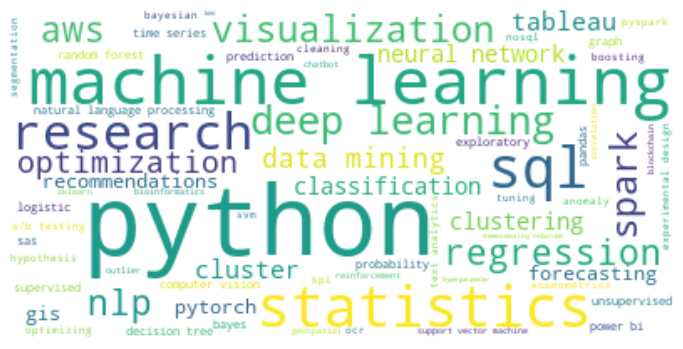

In [67]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wc = WordCloud(background_color='white',
               stopwords=STOPWORDS,
               max_words=200).generate_from_frequencies(d)

plt.subplots(figsize = (12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('Skills.png')
plt.show()

## 8.3 Plotting Bar Chart using plotly for top 15 skills.

In [98]:
sorted_d = dict(sorted(d.items(), key = lambda x: x[1], reverse = True))

first_n = dict(zip(list(sorted_d.keys())[:15], list(sorted_d.values())[:15]))

names = list(first_n.keys())
values = list(first_n.values())


data = go.Bar(x= list(first_n.keys()),y=list(first_n.values()),orientation='v',marker={'color':'rosybrown'},
            opacity=0.6)



layout = go.Layout(title='Top 15 most popular skills for a Data Scientist',title_x=0.5,
               yaxis={'title':'Frequency in Job requirement'},
               xaxis={'title':'Skill Name'})


fig = go.Figure(data=data,layout=layout)
fig.update_yaxes(showgrid=False)
fig.update_layout(template = 'plotly_dark')

iplot(fig)

# 9. Created Soft Skills list and then adding corresponding columns for each soft skill in our dataframe.

In [64]:
soft_skills =['communication','curiosity','storytelling','critical thinking','team player','problem solving',
             'business','decision making','research','domain knowledge','logical reasoning','attention to detail',
              'team work','collaboration','presentation','creative','analytical','writing','domain','leadership',
              'listening'
             ]
for i in soft_skills:
    jobsnewdf[i]=jobsnewdf["Description"].str.find(i.lower())>0


## 9.1 Creating dictionary for each soft skill and count of those skills as values.

In [54]:
words=soft_skills
dss ={}
for i in words:
    dss[i]= jobsnewdf[i].values.sum()

## 9.2 Plotting Wordcloud for skill using generate from frequencies of "WordCloud" .

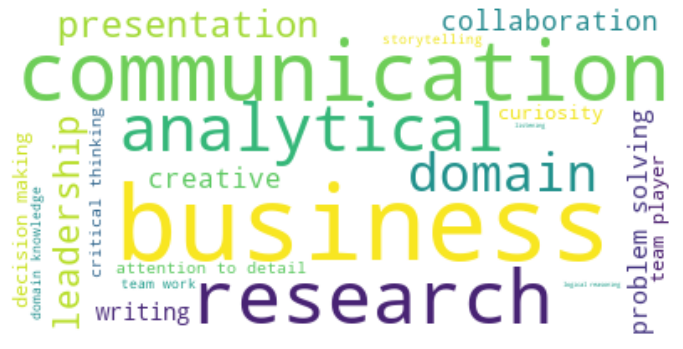

In [69]:
wc = WordCloud(background_color='white',
               stopwords=STOPWORDS,
               max_words=200).generate_from_frequencies(dss)

plt.subplots(figsize = (12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('Soft_skills.png')
plt.show()

## 9.3 Plotting Bar Chart using plotly for top 15 soft skills

In [103]:
sorted_dss = dict(sorted(dss.items(), key = lambda x: x[1], reverse = True))

first_n_dss = dict(zip(list(sorted_dss.keys())[:15], list(sorted_dss.values())[:15]))

names = list(first_n_dss.keys())
values = list(first_n_dss.values())


data = go.Bar(x= list(first_n_dss.keys()),y=list(first_n_dss.values()),orientation='v',marker={'color':'rosybrown'},
            opacity=0.6)



layout = go.Layout(title='Top 15 most popular soft skills for a Data Scientist',title_x=0.5,
               yaxis={'title':'Frequency in Job requirement'},
               xaxis={'title':'Soft Skill Name'})


fig = go.Figure(data=data,layout=layout)
fig.update_yaxes(showgrid=False)
fig.update_layout(template = 'plotly_dark')

iplot(fig)